<a href="https://colab.research.google.com/github/lorek/Probability_Course_Labs/blob/main/ProbLab_List_nr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import numpy as np
import matplotlib.pyplot as plt

### NumPy: randomness

Computers use Pseudorandom Number Generators (PRNG, aka *deterministic random data*), deterministic procedures outputting numbers which *should* "look like random numbers".
PRNG depends on initial value called `seed`, which we can set:

In [168]:
np.random.seed(0)
np.random.uniform(0,1) # random uniformly chosen from interval [0,1].
                       # Because of set seed, the result should be the same each time

0.5488135039273248

In [169]:
numbers = np.random.uniform(0,1,100) # 100 numbers

In [170]:
print(numbers)

[0.71518937 0.60276338 0.54488318 0.4236548  0.64589411 0.43758721
 0.891773   0.96366276 0.38344152 0.79172504 0.52889492 0.56804456
 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985 0.77815675
 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918 0.11827443
 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194 0.26455561
 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355  0.61209572
 0.616934   0.94374808 0.6818203  0.3595079  0.43703195 0.6976312
 0.06022547 0.66676672 0.67063787 0.21038256 0.1289263  0.31542835
 0.36371077 0.57019677 0.43860151 0.98837384 0.10204481 0.20887676
 0.16130952 0.65310833 0.2532916  0.46631077 0.24442559 0.15896958
 0.11037514 0.65632959 0.13818295 0.19658236 0.36872517 0.82099323
 0.09710128 0.83794491 0.09609841 0.97645947 0.4686512  0.97676109
 0.60484552 0.73926358 0.03918779 0.28280696 0.12019656 0.2961402
 0.11872772 0.31798318 0.41426299 0.0641475  0.69247212 0.56660145
 0.26538949 0.52324805 0.09394051 0.5759465  0.9292962  0.318568

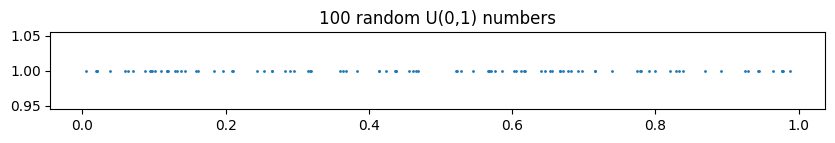

In [171]:
plt.figure(figsize=(10,1))
plt.scatter(numbers, np.ones(len(numbers)),s=1) # s=1 -- size
plt.title(str(len(numbers))+" random U(0,1) numbers")
plt.show()

In [172]:
#2d numbers

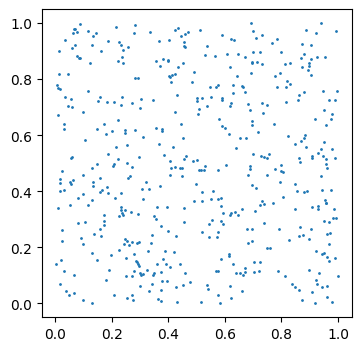

In [173]:
x_rand = np.random.uniform(0,1,500)
y_rand = np.random.uniform(0,1,500)

plt.figure(figsize=(4,4))
plt.scatter(x_rand, y_rand,s=1)


## Estimate $\pi$

A quarter of a circle: its area is $\pi/4$.
If we sample $R$ 2d points $(U_{1,1}, U_{1,2}), \ldots, (U_{R,1}, U_{R,2})$,
then the  the fraction within a circle (simple test: whether $U_{i,1}^2+U_{i,2}^2\leq 1$ or not) times 4 is an estimtor of $\pi$

Btw (we will use it to plot) the quarter of the circle: $y=\sqrt{1-x^2}, x\in(0,1)$

[0.82858461 0.57680143 0.30317374 0.65406665 0.66372354]
estimate_pi =  3.1744


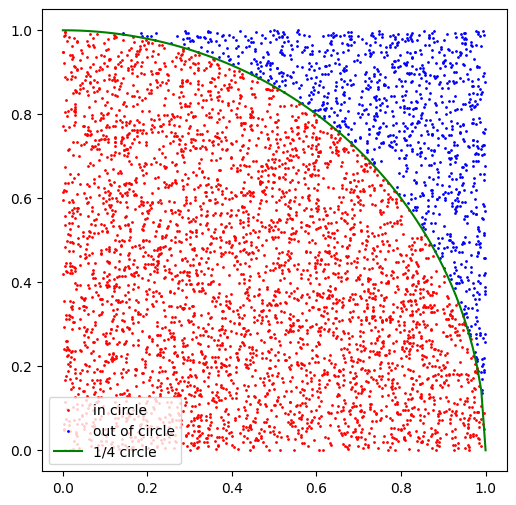

In [196]:
#estimate

R=5000
x_rand = np.random.uniform(0,1,R)
y_rand = np.random.uniform(0,1,R)

test = x_rand**2 + y_rand**2
print(test[:5])

estimate_pi=4*np.mean(test<=1) # np.mean([False, False, True, True]) = 0.5
print("estimate_pi = ",estimate_pi)

# plot

x_in_circle = x_rand[test<=1]
y_in_circle = y_rand[test<=1]

x_out_circle = x_rand[test>1]
y_out_circle = y_rand[test>1]


plt.figure(figsize=(6,6))
plt.scatter(x_in_circle, y_in_circle,s=1, label="in circle",c="red")
plt.scatter(x_out_circle, y_out_circle,s=1, label="out of circle",c="blue")

x_cir=np.linspace(0,1,100)
y_cir=np.sqrt(1-x_cir**2)
plt.plot(x_cir, y_cir, label="1/4 circle",c="green")

plt.legend()


### go back to 1d

In [175]:
numbers = np.random.uniform(0,1,100) # 100 numbers

Many built-in distribions, e.g., discrete so-called geometric distribution

$$X\sim Geo(p) \ \textrm{with success prob }\ p: \qquad P(X=k)=(1-p)^{k-1}p, \quad k=1,2,\ldots,$$

In [176]:
z=np.random.geometric(p=0.15, size=50000)
print(z)
print(z.shape)

[ 1 30  9 ...  5  1 27]
(50000,)


### histogram:
* create bins: $[a_0, a_1], [a_2,a_3],....$
* compute number of values within each bin $[a_{2k}, a_{2k+1}]$
* using `np.histogram` -- we may provide bins all tell it to construct them automatically

In [177]:

bin_edges = np.array([0,2,5,8,44,55]) # bins [0,1],[1,2],[2,5], [5,8], [8,44],[44,55]
hist, _ = np.histogram(z, bins=bin_edges)
print(hist,)

[ 7654 16230 10173 15894    43]


(array([ 7654., 16230., 10173., 15894.,    43.]),
 array([ 0.,  2.,  5.,  8., 44., 55.]),
 <BarContainer object of 5 artists>)

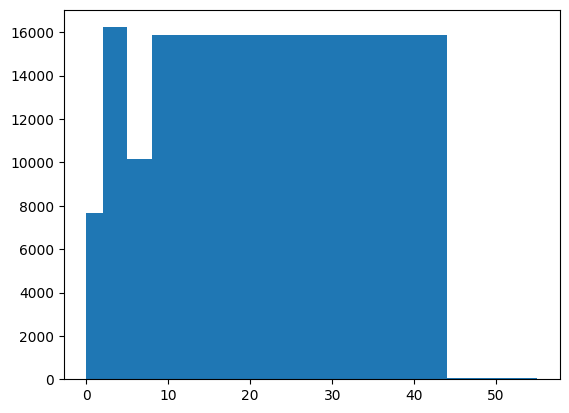

In [178]:
plt.hist(z, bin_edges)

In [179]:
hist, bin_edges_auto = np.histogram(z)

In [180]:
print("bin_edges_auto = ", bin_edges_auto)

bin_edges_auto =  [ 1.   7.3 13.6 19.9 26.2 32.5 38.8 45.1 51.4 57.7 64. ]


(array([3.4057e+04, 9.9680e+03, 3.7320e+03, 1.5260e+03, 4.5600e+02,
        1.6300e+02, 5.8000e+01, 2.3000e+01, 1.1000e+01, 6.0000e+00]),
 array([ 1. ,  7.3, 13.6, 19.9, 26.2, 32.5, 38.8, 45.1, 51.4, 57.7, 64. ]),
 <BarContainer object of 10 artists>)

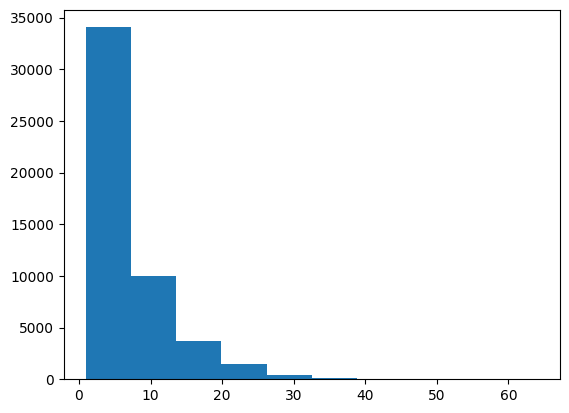

In [181]:
plt.hist(z, bin_edges_auto)

(array([1.9306e+04, 8.5380e+03, 6.2130e+03, 4.4010e+03, 3.2190e+03,
        2.3480e+03, 1.6430e+03, 1.2450e+03, 8.4400e+02, 6.1900e+02,
        6.3000e+02, 2.7700e+02, 2.0900e+02, 1.4900e+02, 9.8000e+01,
        7.7000e+01, 4.7000e+01, 3.9000e+01, 2.7000e+01, 1.6000e+01,
        1.5000e+01, 1.0000e+01, 7.0000e+00, 6.0000e+00, 5.0000e+00,
        6.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ,
        24.1, 26.2, 28.3, 30.4, 32.5, 34.6, 36.7, 38.8, 40.9, 43. , 45.1,
        47.2, 49.3, 51.4, 53.5, 55.6, 57.7, 59.8, 61.9, 64. ]),
 <BarContainer object of 30 artists>)

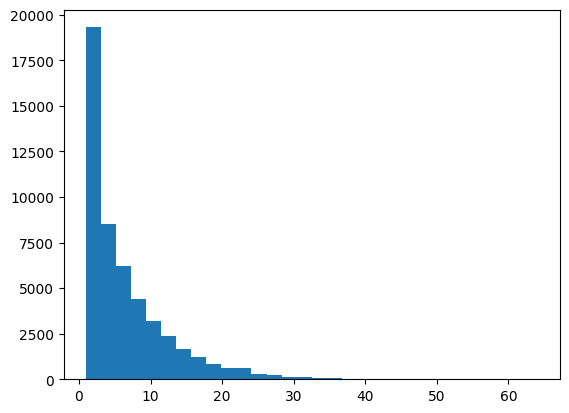

In [182]:
hist, bin_edges_auto = np.histogram(z, bins=30) # if bins=nr, then auto but nr bins
plt.hist(z, bin_edges_auto)

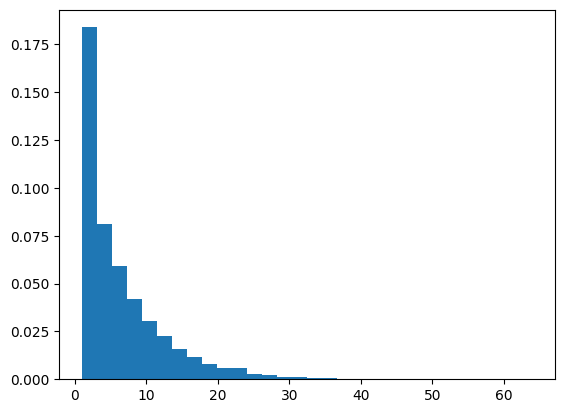

In [183]:
# frequency histogram
hist, bin_edges_auto = np.histogram(z, bins=30, density=True)
_=plt.hist(z, bin_edges_auto, density=True)

### Own discrete distribution


### Flip a coin with head (nr 1) probability $p$ and tail (nr 0) prob $1-p$
trick:

In [184]:
p=0.24
u=np.random.uniform(0,1,100)

coins = (u<=p)*1
print("coins = ", coins)


coins =  [0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0]


### General distribution.

E.g., $$P(X=-3)=0.2,\quad P(X=0)=0.3,\quad P(X=7)=0.1, \quad P(X=9)=0.4$$

In [185]:
elements=np.array([-3,0,7,9])
probs = np.array([0.2, 0.3, 0.1, 0.4])
n=200
x=np.random.choice(elements, size=n, p=probs)

print(x)
print(np.mean(x))

[-3  7  0  0  0  0  9 -3 -3  9  0  9  9  9  0  0  0  0  9  0  7 -3 -3 -3
  9  0 -3 -3  9 -3  9  0  9  0  9  9  0  0  0  7  7  9 -3  0  0  9 -3  9
  0  9  0  7 -3 -3  0  0  9  9  9 -3  9  9  9  9  9  9  0  0  0 -3  9  9
  0  9  0  0  0 -3  0 -3 -3 -3  0  9  0 -3  9  9 -3 -3 -3  0  7 -3  7  0
 -3  9  9 -3  9  9  9 -3  0 -3  9  0  0  9  9  7  9  9  0  7  9  9  0  9
  9  9  7 -3 -3  7  9  7  9  0  9  9  0 -3  9  9  0  9  7  9 -3  9  0  9
 -3  9  7  9 -3  7  0 -3  9  9  7 -3  9 -3 -3  9  0  0  9  9  0  9  9  0
  7 -3  9  7  0  9  0  0  9  9  9  9  0 -3  9 -3  0 -3  0  0  0  7  9  0
 -3 -3  0  7  9 -3 -3  9]
3.43


$x_1,x_2,\ldots, x_n$. Two foundamental measures:

Sample mean and variance $$\hat{x}_n = {1\over n} \sum_{i=1}^n x_i, \quad s^2_n={1\over n-1} \sum_{i=1}^n (x_i-\hat{x}_n)^2$$

In [186]:
x_hat = np.mean(x)

#s^2 built in
x_s2 = np.var(x,ddof=1)

#s^2 manually
x_s2_ver2= np.sum( (x-x_hat)**2)/(len(x)-1)

print(x_hat, x_s2, x_s2_ver2)

3.43 26.1156783919598 26.1156783919598


# Standard normalization

$$x_i' = {x_i-\hat{x}\over \sqrt{s^2}}$$

In [187]:
xp=(x-x_hat)/np.sqrt(x_s2)

rescaled points have mean 0 and s2 = 1

In [188]:
print(np.round(np.mean(xp),3), np.var(xp,ddof=1))

0.0 0.9999999999999997


# Histograms of normalized sums


Now we perform the following experiment.
* Fix `n` (e.g., 1000) and `R` (e.g., 3000)
* Repeat `R` times `for i in np.arange(R)`:
** sample x_1,....,x_n
** compute sum of sample and store it as $z_i= \sum_{i=1}^n x_i$
* Finally we have `z_1, z_2,..,z_R` we normalize them as previously, i.e., $z_i'={z_i-\hat{z}\over s^2}$ and plot their histogram


In [189]:
elements=np.array([-5,-4,-2, 0, 1, 3, 7, 9])
probs = np.array([0.13, 0.13, 0.11, 0.37, 0.03, 0.1, 0.09,0.04])
print(np.sum(probs))

1.0


In [190]:
n=1000
R=3000

z=[] # empty list

for i in range(R):
    x = np.random.choice(elements, size=n, p=probs)
    x_hat = np.sum(x)
    z.append(x_hat)

z=np.array(z)

# now we NORMALIZE z
z_hat = np.mean(z)

#s^2
z_s2 = np.var(z,ddof=1)

zp = (z-z_hat)/np.sqrt(z_s2)

print(np.round(np.mean(zp),3), np.var(zp,ddof=1))

-0.0 1.0


plot histogram together with function
$$f(x)={1\over \sqrt{2\pi}} e^{-{x^2\over 2}}$$

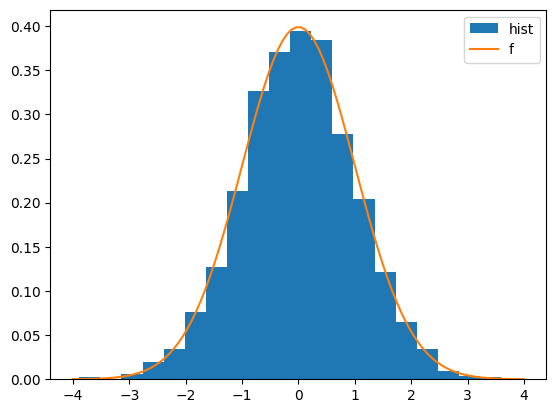

In [191]:
_=plt.hist(zp,bins=20, density=True, label="hist")

xx=np.linspace(-4,4,100)
yy=np.exp(-xx**2/2)/np.sqrt(2*np.pi)

plt.plot(xx,yy,label="f")
plt.legend()
plt.show()

# QUESTIONS / EXERCISES

## Q1.1
* Reapeat estimation of $\pi$ using `R=[10000, 20000,50000]` replications. Print the absolute difference of estimation and true value of $\pi$ (use `np.pi`)

## Q1.2
* Estimate $\int_0^\pi \sin(x)\;dx$ in a similar fashion to estimation of $\pi$. Sample $R$ 2d points from a rectangle $[0,\pi]\times[0,1]$ and compute fraction below $y=\sin(x)$.
* Repeat for different $R$, compate to true value of the integral

## Q1.3

In [205]:
elementsA=np.array([-15,-5, 2, 17])
probsA = np.array([0.21, 0.11, 0.29, 0.39])

# fair coin
elementsA=np.array([0,1])

# 10 samples from Poisson distribution with parameter lambda=3
np.random.poisson(3,size=10)


array([3, 2, 5, 3, 6, 3, 3, 4, 2, 2])

* a) sample from  `elementsA`, `probsA`, plot histogram
* b) repeat the procedure "*Histograms of normalized sums*" for `elementsA`, `probsA`
* c) repeat above two steps for `elementsB`, `probsB`
* d) sample $n=20000$ points from Poisson distr. with parameter lambda=10, make histogram with 25 bins
* e) repeat the procedure "*Histograms of normalized sums*" for Poisson distribution.

What conclusion can you make for "*Histograms of normalized sums*" ?

## Q1.4

* Read about  [Monte Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem). Simulate the game show 10k times and estimate the probabilities of winning in using two strategies:
** do not change intially chosen door
** always change intially chosen door